In [15]:
import iris
import iris.plot as iplt
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
path= "/g/data/ia39/australian-climate-service/test-data/CORDEX-CMIP6/output/AUS-15/BOM/ECMWF-ERA5/evaluation/r1i1p1f1/BOM-BARPA-R/v1/mon/"

In [3]:
varlist = ["rlus","rlds","rsds","rsus","hfls","hfss"]

In [11]:
data = {}
for var in varlist:
    data[var] = iris.load(path+"{var}/{var}_AUS-15_ECMWF-ERA5_evaluation_r1i1p1f1_BOM-BARPA-R_v1_mon_197901-197912.nc".format(var=var))[0].collapsed('time',iris.analysis.MEAN)

In [12]:
data

{'rlus': <iris 'Cube' of surface_upwelling_longwave_flux_in_air / (W m-2) (latitude: 436; longitude: 777)>,
 'rlds': <iris 'Cube' of surface_downwelling_longwave_flux_in_air / (W m-2) (latitude: 436; longitude: 777)>,
 'rsds': <iris 'Cube' of surface_downwelling_shortwave_flux_in_air / (W m-2) (latitude: 436; longitude: 777)>,
 'rsus': <iris 'Cube' of surface_upwelling_shortwave_flux_in_air / (W m-2) (latitude: 436; longitude: 777)>,
 'hfls': <iris 'Cube' of surface_upward_latent_heat_flux / (W m-2) (latitude: 436; longitude: 777)>,
 'hfss': <iris 'Cube' of surface_upward_sensible_heat_flux / (W m-2) (latitude: 436; longitude: 777)>}

In [14]:
net=data['rlus']+data['rsus']+data['hfls']+data['hfss']-data['rlds']-data['rsds']

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/iris/coords.py:2045: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/iris/coords.py:2045: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(


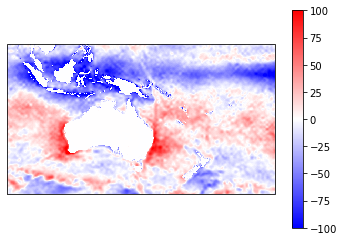

In [17]:
ax=plt.subplot(111,projection=ccrs.PlateCarree(180))
iplt.pcolormesh(net,vmin=-100,vmax=100,cmap='bwr')
plt.colorbar()